In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from hmmlearn import hmm

In [2]:
dataframe = pd.read_csv('New_York_State.csv')

In [3]:
dataframe

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,12/1/2022,Erie,88,259844,1194,4240709,8.24%,COUNTY
1,11/30/2022,Erie,138,259756,1735,4239515,7.30%,COUNTY
2,11/29/2022,Erie,149,259618,1404,4237780,9.27%,COUNTY
3,11/28/2022,Erie,82,259469,1057,4236376,6.61%,COUNTY
4,11/27/2022,Erie,68,259387,1045,4235319,6.35%,COUNTY
...,...,...,...,...,...,...,...,...
1001,3/5/2020,Erie,0,0,6,12,0.00%,COUNTY
1002,3/4/2020,Erie,0,0,6,6,0.00%,COUNTY
1003,3/3/2020,Erie,0,0,0,0,0.00%,COUNTY
1004,3/2/2020,Erie,0,0,0,0,0.00%,COUNTY


In [4]:
dataframe = dataframe[['New Positives','Test Date']]

In [5]:
dataframe.iloc[-1:,:]

,New Positives,Test Date
1005,0,3/1/2020


In [6]:
# For past 24 months, distribution of all the postives of coronavirus 


arr = dataframe['New Positives'].to_numpy()

In [7]:
dataframe.loc[dataframe['Test Date']=='1/1/2021']

,New Positives,Test Date
699,477,1/1/2021


In [8]:
dataframe.loc[dataframe['Test Date']=='12/1/2022']

,New Positives,Test Date
0,88,12/1/2022


In [9]:
dataframe_1 = dataframe.iloc[0:700]

In [10]:
dataframe_1

,New Positives,Test Date
0,88,12/1/2022
1,138,11/30/2022
2,149,11/29/2022
3,82,11/28/2022
4,68,11/27/2022
...,...,...
695,800,1/5/2021
696,374,1/4/2021
697,509,1/3/2021
698,468,1/2/2021


In [11]:
arra = np.array(list(reversed(dataframe_1['New Positives'].to_numpy())))

In [12]:
arr = arra

In [13]:
arr

array([ 477,  468,  509,  374,  800,  461, 1032,  777,  663,  355,  550,
        528,  496,  749,  489,  668,  334,  510,  245,  591,  541,  492,
        405,  371,  311,  409,  487,  496,  398,  432,  236,  216,  241,
        513,  341,  386,  269,  259,  131,  350,  388,  331,  318,  415,
        199,  209,  183,  341,  230,  286,  220,  210,  185,  203,  348,
        275,  274,  252,  204,  152,  218,  270,  285,  260,  214,  169,
        187,  196,  213,  320,  176,  246,  218,  203,  218,  309,  321,
        342,  387,  197,  306,  224,  389,  410,  508,  375,  439,  390,
        429,  506,  423,  481,  476,  489,  300,  424,  526,  578,  534,
        490,  363,  379,  597,  585,  390,  627,  430,  313,  297,  326,
        394,  435,  272,  241,  215,  233,  223,  342,  288,  272,  167,
        136,  155,  120,  136,  144,  272,  133,   88,   87,   95,  143,
        113,  122,   84,   73,   53,   78,   88,   81,   78,   40,   73,
         33,   56,   55,   38,   39,   51,   19,   

C:\Users\darry\AppData\Local\Temp\ipykernel_36628\826088116.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


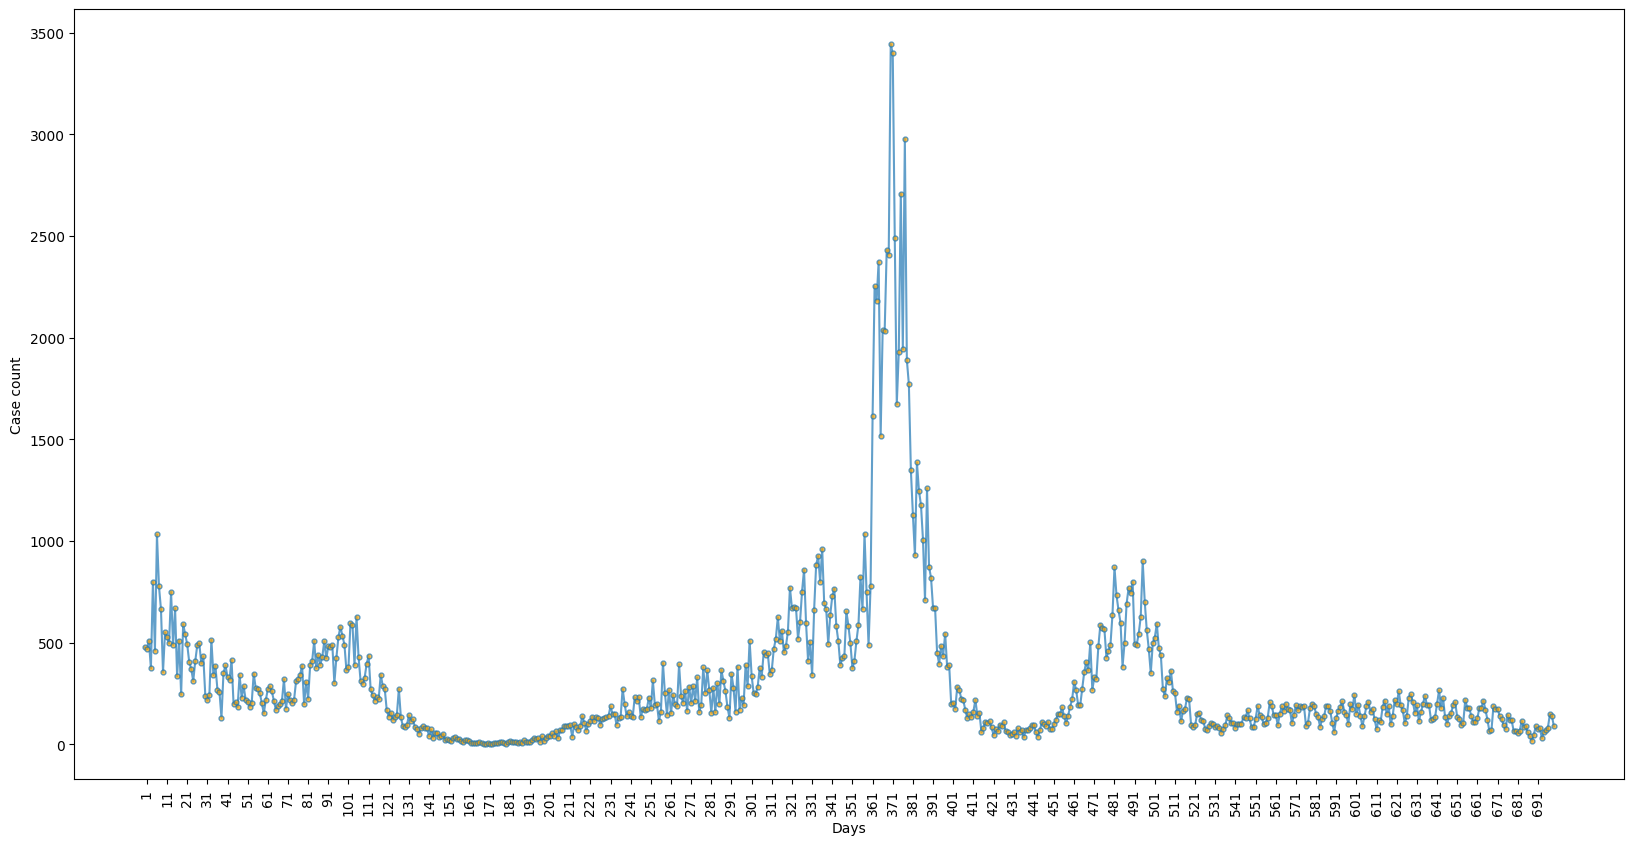

In [14]:


import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import poisson
from hmmlearn import hmm




# Plot the sampled data
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(arr, ".-", ms=7, mfc="orange", alpha=0.7)
ax.set_xticks(range(1, 701, 10))
ax.set_xticklabels(range(1, 701, 10),rotation=90)
ax.set_xlabel('Days')
ax.set_ylabel('Case count')
fig.show()

# %%
# Now, fit a Poisson Hidden Markov Model to the data.


In [15]:
import random
for i in range(1,10):
    print(random.randint(1,10))

random = list(set([random.randint(1,10) for _ in range(1,10)]))
print(random)

1
10
8
10
10
2
9
6
1
[1, 2, 4, 5, 7, 9]


In [16]:
scores = list()
models = list()
for n_components in range(1, 5):
    for idx in range(1,11):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.PoissonHMM(n_components=n_components, random_state=idx,
                               n_iter=10)
        model.fit(arr[:, None])
        models.append(model)
        scores.append(model.score(arr[:, None]))
        print(f'Converged: {model.monitor_.converged}\t\t'
              f'Score: {scores[-1]}')


Converged: True		Score: -114302.25003323331
Converged: True		Score: -114302.25003323331
Converged: True		Score: -114302.25003323331
Converged: True		Score: -114302.25003323331
Converged: True		Score: -114302.25003323331
Converged: True		Score: -114302.25003323331
Converged: True		Score: -114302.25003323331
Converged: True		Score: -114302.25003323331
Converged: True		Score: -114302.25003323331
Converged: True		Score: -114302.25003323331
Converged: True		Score: -45946.49567094533
Converged: True		Score: -45920.510312535225
Converged: True		Score: -45929.29877698069
Converged: True		Score: -46288.105981377004
Converged: True		Score: -45936.13354403511
Converged: True		Score: -46019.20451906189
Converged: True		Score: -45942.37439665158
Converged: True		Score: -46021.056799993115
Converged: True		Score: -45951.002559702545
Converged: True		Score: -45869.643024079196
Converged: True		Score: -31704.735095188407
Converged: True		Score: -28024.479404250465
Converged: True		Score: -21432.666262

In [17]:

# get the best model
model = models[np.argmax(scores)]
print(f'The best model had a score of {max(scores)} and '
      f'{model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model.predict(arr[:, None])



The best model had a score of -14051.05636957947 and 4 components


Text(0.5, 0, 'State')

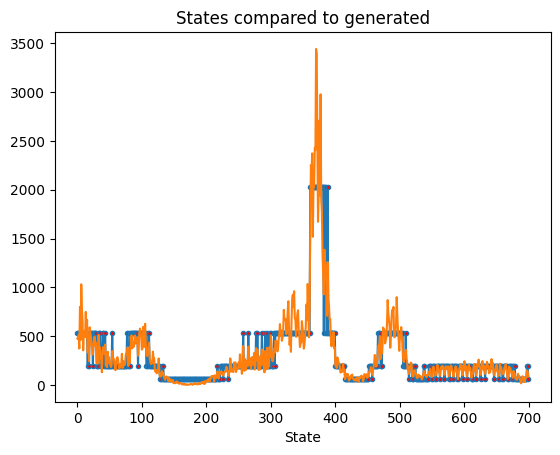

In [18]:
# %%
# Let's plot the waiting times from our most likely series of states of
# earthquake activity with the earthquake data. As we can see, the
# model with the maximum likelihood had different states which may reflect
# times of varying earthquake danger.

# plot model states over time
fig, ax = plt.subplots()
ax.plot(model.lambdas_[states], ".-", ms=6, mfc="red")
ax.plot(arr)
ax.set_title('States compared to generated')
ax.set_xlabel('State')


Text(0, 0.5, 'State From')

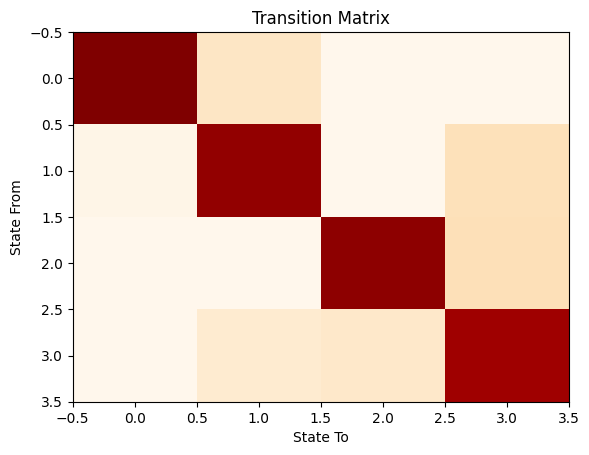

In [19]:

# %%
# Fortunately, 2006 ended with a period of relative tectonic stability, and,
# if we look at our transition matrix, we can see that the off-diagonal terms
# are small, meaning that the state transitions are rare and it's unlikely that
# there will be high earthquake danger in the near future.

fig, ax = plt.subplots()
ax.imshow(model.transmat_, aspect='auto', cmap='OrRd')
ax.set_title('Transition Matrix')
ax.set_xlabel('State To')
ax.set_ylabel('State From')


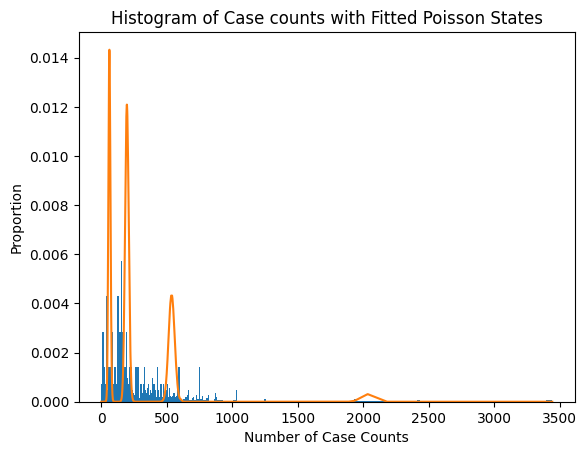

In [20]:

# %%
# Finally, let's look at the distribution of earthquakes compared to our
# waiting time parameter values. We can see that our model fits the
# distribution fairly well, replicating results from the reference.

# get probabilities for each state given the data, take the average
# to find the proportion of time in that state
prop_per_state = model.predict_proba(arr[:, None]).mean(axis=0)

# earthquake counts to plot
bins = sorted(np.unique(arr))

fig, ax = plt.subplots()
ax.hist(arr, bins=bins, density=True)
ax.plot(bins, np.dot(poisson.pmf(bins, model.lambdas_).T,
                     prop_per_state[:, None]))
ax.set_title('Histogram of Case counts with Fitted Poisson States')
ax.set_xlabel('Number of Case Counts')
ax.set_ylabel('Proportion')

plt.show()

C:\Users\darry\AppData\Local\Temp\ipykernel_36628\959953318.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -341.89397049875356
Converged: True		Score: -341.88244772721276
Converged: True		Score: -342.1445482378523
Converged: True		Score: -341.8929674859702
Converged: True		Score: -341.88555381993297
Converged: True		Score: -342.2876227612769
Converged: True		Score: -342.53692921035815
Converged: True		Score: -341.88750207762206
Converged: True		Score: -341.8789363379968
Converged: True		Score: -342.9703881743699
Converged: True		Score: -343.0429169039872
Converged: True		Score: -342.08452039551855
Converged: True		Score: -342.6892743201986
Conve

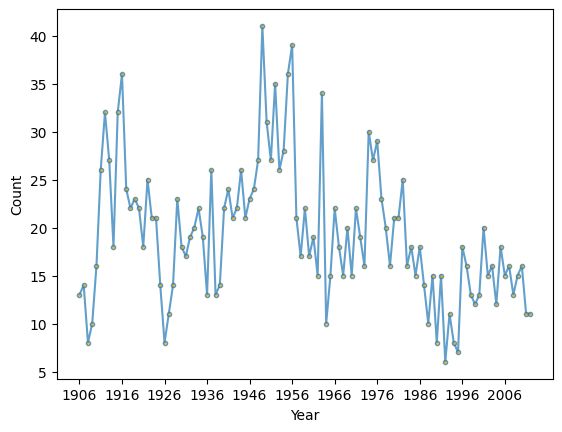

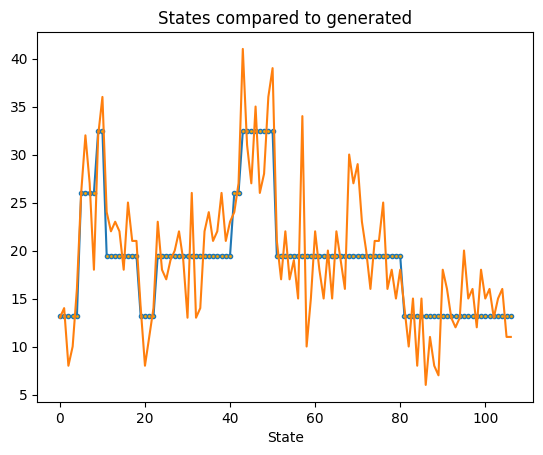

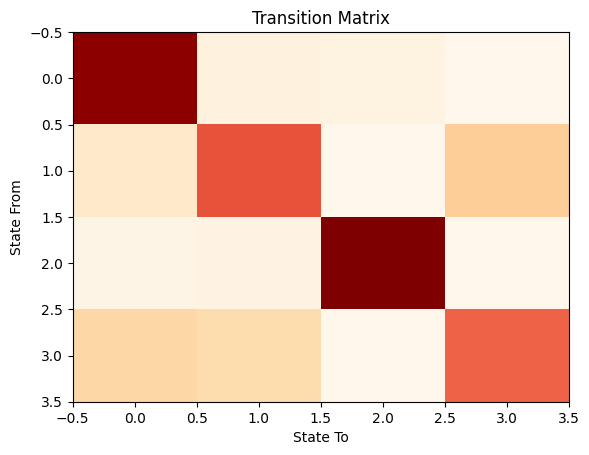

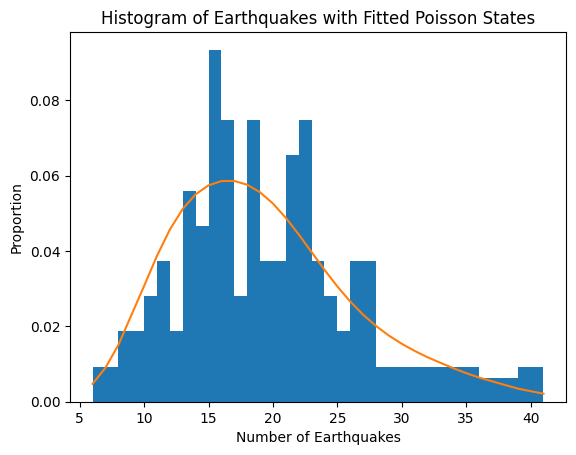

In [21]:

earthquakes = np.array([
    13, 14, 8, 10, 16, 26, 32, 27, 18, 32, 36, 24, 22, 23, 22, 18,
    25, 21, 21, 14, 8, 11, 14, 23, 18, 17, 19, 20, 22, 19, 13, 26,
    13, 14, 22, 24, 21, 22, 26, 21, 23, 24, 27, 41, 31, 27, 35, 26,
    28, 36, 39, 21, 17, 22, 17, 19, 15, 34, 10, 15, 22, 18, 15, 20,
    15, 22, 19, 16, 30, 27, 29, 23, 20, 16, 21, 21, 25, 16, 18, 15,
    18, 14, 10, 15, 8, 15, 6, 11, 8, 7, 18, 16, 13, 12, 13, 20,
    15, 16, 12, 18, 15, 16, 13, 15, 16, 11, 11])


# Plot the sampled data
fig, ax = plt.subplots()
ax.plot(earthquakes, ".-", ms=6, mfc="orange", alpha=0.7)
ax.set_xticks(range(0, earthquakes.size, 10))
ax.set_xticklabels(range(1906, 2007, 10))
ax.set_xlabel('Year')
ax.set_ylabel('Count')
fig.show()

# %%
# Now, fit a Poisson Hidden Markov Model to the data.

scores = list()
models = list()
for n_components in range(1, 5):
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.PoissonHMM(n_components=n_components, random_state=idx,
                               n_iter=10)
        model.fit(earthquakes[:, None])
        models.append(model)
        scores.append(model.score(earthquakes[:, None]))
        print(f'Converged: {model.monitor_.converged}\t\t'
              f'Score: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
print(f'The best model had a score of {max(scores)} and '
      f'{model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model.predict(earthquakes[:, None])

# %%
# Let's plot the waiting times from our most likely series of states of
# earthquake activity with the earthquake data. As we can see, the
# model with the maximum likelihood had different states which may reflect
# times of varying earthquake danger.

# plot model states over time
fig, ax = plt.subplots()
ax.plot(model.lambdas_[states], ".-", ms=6, mfc="orange")
ax.plot(earthquakes)
ax.set_title('States compared to generated')
ax.set_xlabel('State')

# %%
# Fortunately, 2006 ended with a period of relative tectonic stability, and,
# if we look at our transition matrix, we can see that the off-diagonal terms
# are small, meaning that the state transitions are rare and it's unlikely that
# there will be high earthquake danger in the near future.

fig, ax = plt.subplots()
ax.imshow(model.transmat_, aspect='auto', cmap='OrRd')
ax.set_title('Transition Matrix')
ax.set_xlabel('State To')
ax.set_ylabel('State From')

# %%
# Finally, let's look at the distribution of earthquakes compared to our
# waiting time parameter values. We can see that our model fits the
# distribution fairly well, replicating results from the reference.

# get probabilities for each state given the data, take the average
# to find the proportion of time in that state
prop_per_state = model.predict_proba(earthquakes[:, None]).mean(axis=0)

# earthquake counts to plot
bins = sorted(np.unique(earthquakes))

fig, ax = plt.subplots()
ax.hist(earthquakes, bins=bins, density=True)
ax.plot(bins, np.dot(poisson.pmf(bins, model.lambdas_).T,
                     prop_per_state[:, None]))
ax.set_title('Histogram of Earthquakes with Fitted Poisson States')
ax.set_xlabel('Number of Earthquakes')
ax.set_ylabel('Proportion')

plt.show()